In [ ]:
#Series
import pandas as pd
s = pd.Series([1, 3, 5, 7], index=['a', 'b', 'c', 'd'])
print(s)

a    1
b    3
c    5
d    7
dtype: int64


In [ ]:
#DataFrame
data = {
    "ProductID": [101, 102, 103],
    "SalesAmount": [200, 150, 400],
    "Region": ["North", "South", "West"]
}
df = pd.DataFrame(data)
print(df)

   ProductID  SalesAmount Region
0        101          200  North
1        102          150  South
2        103          400   West


In [ ]:
import pandas as pd

# Load a CSV file into a DataFrame
df = pd.read_csv("sales-data.csv")

# Loading CSV with specific delimiter and data types
df = pd.read_csv("sales-data.csv", sep=",", dtype={"SalesAmount": float})

# Inspect the first few rows of the DataFrame
print(df.head())

         Date  ProductID  SalesAmount Region
0  2024-01-01        101        200.0  North
1  2024-01-02        102        150.0  South
2  2024-01-03        103        400.0   West
3  2024-01-04        104        300.0   East
4  2024-01-05        105        250.0  North


In [ ]:
import pandas as pd

# Creating a Pandas Series from a list
sales = pd.Series([200, 150, 400, 300], index=["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04"])
print(sales)

2024-01-01    200
2024-01-02    150
2024-01-03    400
2024-01-04    300
dtype: int64


In [ ]:
# Load the file in chunks of 10,000 rows
chunk_size = 10000
for chunk in pd.read_csv('sales-data.csv', chunksize=chunk_size):
    # Process each chunk
    process(chunk)

NameError: name 'process' is not defined

In [ ]:
# Load a compressed CSV file
df = pd.read_csv('sales_data.csv.gz', compression='gzip')

In [ ]:
# Load an Excel file into a DataFrame
df = pd.read_excel('sales_data.xlsx', sheet_name='Sheet1')
# Load all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel('sales_data.xlsx', sheet_name=None)
# Load multiple specific sheets
df_sheets = pd.read_excel('sales_data.xlsx', sheet_name=['Sheet1', 'Sheet2'])
# Fill missing values after loading an Excel file with merged cells
# df.fillna(method='ffill', inplace=True)
all_sheets

,Date,ProductID,SalesAmount,Region
0,2024-01-01,101,200.0,North
1,2024-01-02,102,150.0,South
2,2024-01-03,103,400.0,West
3,2024-01-04,104,300.0,East
4,2024-01-05,105,250.0,North
5,2024-01-06,106,350.0,West
6,2024-01-07,107,275.0,South
7,2024-01-08,108,425.0,North
8,2024-01-09,109,180.0,East
9,2024-01-10,110,300.0,West


In [ ]:
import json
import pandas as pd

# Load a JSON file into a DataFrame
df = pd.read_json('sales_data.json')


# Sample nested JSON data
data = '''
{
  "store": {
    "book": [
      { "category": "fiction", "price": 10 },
      { "category": "non-fiction", "price": 12 }
    ]
  }
}
'''

# Load and normalize nested JSON data
json_data = json.loads(data)
df = pd.json_normalize(json_data, record_path=['store', 'book'])
print(df)

FileNotFoundError: File sales_data.json does not exist

In [ ]:
import requests
import pandas as pd

# Define the API endpoint
url = 'https://api.example.com/sales'

# Make a GET request to the API
response = requests.get(url)

# Ensure the response was successful
if response.status_code == 200:
    # Convert the response JSON data into a DataFrame
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")

ConnectionError: HTTPSConnectionPool(host='api.example.com', port=443): Max retries exceeded with url: /sales (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x78efbffedb40>: Failed to resolve 'api.example.com' ([Errno -2] Name or service not known)"))

In [ ]:
import requests
import pandas as pd

# API URL with pagination
url = 'https://api.example.com/sales'
params = {'page': 1}
all_data = []

# Loop through all pages of the API
while True:
    response = requests.get(url, params=params)
    if response.status_code == 200:
        # Convert the current page's data into a DataFrame
        data = response.json()
        if not data:
            break  # Stop if no more data
        df = pd.DataFrame(data)
        all_data.append(df)
        params['page'] += 1  # Increment the page number for the next request
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        break

# Concatenate all pages into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)
print(final_df.head())

In [ ]:
# Define the API URL and headers
url = 'https://api.example.com/sales'
headers = {'Authorization': 'Bearer YOUR_API_TOKEN'}

# Make the API request with authentication
response = requests.get(url, headers=headers)

# Convert the response to a DataFrame
data = response.json()
df = pd.DataFrame(data)
print(df.head())

In [ ]:
import pymongo
import pandas as pd

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['sales_db']
collection = db['sales']

# Query the MongoDB collection
cursor = collection.find()

# Convert the cursor to a list and load into a DataFrame
df = pd.DataFrame(list(cursor))
print(df.head())

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    "ProductID": [101, 102, 103, 104],
    "SalesAmount": [200, 150, 400, 300],
    "Region": ["North", "South", "West", "East"]
}

df = pd.DataFrame(data)

# Sort by SalesAmount in ascending order
df_sorted = df.sort_values(by="SalesAmount")
print(df_sorted)

   ProductID  SalesAmount Region
1        102          150  South
0        101          200  North
3        104          300   East
2        103          400   West


In [ ]:
# Sort by Region (ascending) and SalesAmount (descending)
df_sorted_multi = df.sort_values(by=["Region", "SalesAmount"], ascending=[True, False])
print(df_sorted_multi)

   ProductID  SalesAmount Region
3        104          300   East
0        101          200  North
1        102          150  South
2        103          400   West


In [ ]:
# Set a custom index (ProductID) and sort by index
df.set_index('ProductID', inplace=True)
df_sorted_index = df.sort_index()
print(df_sorted_index)

           SalesAmount Region
ProductID                    
101                200  North
102                150  South
103                400   West
104                300   East


In [2]:
# Filter rows where SalesAmount is greater than 200
df_filtered = df[df['SalesAmount'] > 200]
print(df_filtered)

   ProductID  SalesAmount Region
2        103          400   West
3        104          300   East


In [3]:
# Filter rows where SalesAmount is greater than 200 AND Region is "West"
df_filtered = df[(df['SalesAmount'] > 200) & (df['Region'] == 'West')]
print(df_filtered)

   ProductID  SalesAmount Region
2        103          400   West


In [4]:
# Filter rows where Region is either "North" or "West"
df_filtered = df[df['Region'].isin(['North', 'West'])]
print(df_filtered)

   ProductID  SalesAmount Region
0        101          200  North
2        103          400   West


In [5]:
# Using query to filter rows
df_filtered = df.query('SalesAmount > 200 and Region == "West"')
print(df_filtered)

   ProductID  SalesAmount Region
2        103          400   West


In [6]:
# Define a custom function
def add_tax(sales):
    return sales * 1.10  # Add 10% tax

# Apply the function to the SalesAmount column
df['SalesWithTax'] = df['SalesAmount'].apply(add_tax)
print(df)

   ProductID  SalesAmount Region  SalesWithTax
0        101          200  North         220.0
1        102          150  South         165.0
2        103          400   West         440.0
3        104          300   East         330.0


In [7]:
# Apply function row-wise (axis=1)
df['ProductSummary'] = df.apply(lambda row: f"{row['Region']} - {row['SalesAmount']}", axis=1)
print(df)

   ProductID  SalesAmount Region  SalesWithTax ProductSummary
0        101          200  North         220.0    North - 200
1        102          150  South         165.0    South - 150
2        103          400   West         440.0     West - 400
3        104          300   East         330.0     East - 300


In [8]:
# Apply element-wise function to a Series (convert Region names to uppercase)
df['Region'] = df['Region'].map(str.upper)
print(df)

   ProductID  SalesAmount Region  SalesWithTax ProductSummary
0        101          200  NORTH         220.0    North - 200
1        102          150  SOUTH         165.0    South - 150
2        103          400   WEST         440.0     West - 400
3        104          300   EAST         330.0     East - 300


In [9]:
# Apply element-wise function to the entire DataFrame
df[['SalesAmount', 'SalesWithTax']] = df[['SalesAmount', 'SalesWithTax']].applymap(lambda x: round(x, 2))
print(df)

   ProductID  SalesAmount Region  SalesWithTax ProductSummary
0        101          200  NORTH         220.0    North - 200
1        102          150  SOUTH         165.0    South - 150
2        103          400   WEST         440.0     West - 400
3        104          300   EAST         330.0     East - 300


<ipython-input-9-e8ce814ded68>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['SalesAmount', 'SalesWithTax']] = df[['SalesAmount', 'SalesWithTax']].applymap(lambda x: round(x, 2))


In [10]:
# Group by Region and calculate the sum of SalesAmount for each region
grouped = df.groupby('Region')['SalesAmount'].sum()
print(grouped)

Region
EAST     300
NORTH    200
SOUTH    150
WEST     400
Name: SalesAmount, dtype: int64


In [11]:
# Group by Region and apply multiple aggregation functions
grouped_multi = df.groupby('Region').agg({
    'SalesAmount': ['sum', 'mean', 'count']
})
print(grouped_multi)

       SalesAmount             
               sum   mean count
Region                         
EAST           300  300.0     1
NORTH          200  200.0     1
SOUTH          150  150.0     1
WEST           400  400.0     1


In [12]:
# Create a pivot table that groups by Region and calculates the sum of SalesAmount
pivot = pd.pivot_table(df, values='SalesAmount', index='Region', aggfunc='sum')
print(pivot)

        SalesAmount
Region             
EAST            300
NORTH           200
SOUTH           150
WEST            400


In [13]:
# Create a pivot table with multiple aggregation functions
pivot_multi = pd.pivot_table(df, values='SalesAmount', index='Region', aggfunc=['sum', 'mean'])
print(pivot_multi)

               sum        mean
       SalesAmount SalesAmount
Region                        
EAST           300       300.0
NORTH          200       200.0
SOUTH          150       150.0
WEST           400       400.0


In [14]:
# Create a crosstab showing the frequency of each Region and SalesAmount range
df['SalesCategory'] = pd.cut(df['SalesAmount'], bins=[0, 200, 300, 500], labels=['Low', 'Medium', 'High'])
cross_tab = pd.crosstab(df['Region'], df['SalesCategory'])
print(cross_tab)

SalesCategory  Low  Medium  High
Region                          
EAST             0       1     0
NORTH            1       0     0
SOUTH            1       0     0
WEST             0       0     1


In [15]:
# Detect duplicate rows based on all columns
duplicates = df.duplicated()
print(duplicates)

0    False
1    False
2    False
3    False
dtype: bool


In [16]:
# Remove duplicate rows based on the Region column
df_no_duplicates = df.drop_duplicates(subset='Region')
print(df_no_duplicates)

   ProductID  SalesAmount Region  SalesWithTax ProductSummary SalesCategory
0        101          200  NORTH         220.0    North - 200           Low
1        102          150  SOUTH         165.0    South - 150           Low
2        103          400   WEST         440.0     West - 400          High
3        104          300   EAST         330.0     East - 300        Medium


In [17]:
# Calculate the mean SalesAmount
mean_sales = df['SalesAmount'].mean()
print(f"Mean SalesAmount: {mean_sales}")

# Calculate the sum of SalesAmount
total_sales = df['SalesAmount'].sum()
print(f"Total SalesAmount: {total_sales}")

# Calculate the standard deviation of SalesAmount
std_sales = df['SalesAmount'].std()
print(f"Standard Deviation of SalesAmount: {std_sales}")

Mean SalesAmount: 262.5
Total SalesAmount: 1050
Standard Deviation of SalesAmount: 110.86778913041725


In [18]:
# Generate descriptive statistics for numerical columns
summary = df.describe()
print(summary)

        ProductID  SalesAmount  SalesWithTax
count    4.000000     4.000000      4.000000
mean   102.500000   262.500000    288.750000
std      1.290994   110.867789    121.954568
min    101.000000   150.000000    165.000000
25%    101.750000   187.500000    206.250000
50%    102.500000   250.000000    275.000000
75%    103.250000   325.000000    357.500000
max    104.000000   400.000000    440.000000


In [20]:
# Handling Missing Data
# -Identifying missing data,
# -Removing missing data,
# -Imputing missing data,
# -Forward and backward filling,
# -Advanced techniques: Interpolation and filling based on conditions.

In [21]:
import pandas as pd

# Sample DataFrame with missing values
data = {
    "ProductID": [101, 102, 103, 104],
    "SalesAmount": [200, None, 400, 300],
    "Region": ["North", "South", None, "East"]
}

df = pd.DataFrame(data)

# Check for missing values
print(df.isnull())

# Summarize missing values by column
print(df.isnull().sum())

   ProductID  SalesAmount  Region
0      False        False   False
1      False         True   False
2      False        False    True
3      False        False   False
ProductID      0
SalesAmount    1
Region         1
dtype: int64


In [22]:
# Remove rows with any missing values
df_cleaned_rows = df.dropna()
print(df_cleaned_rows)

   ProductID  SalesAmount Region
0        101        200.0  North
3        104        300.0   East


In [23]:
# Remove columns with any missing values
df_cleaned_columns = df.dropna(axis=1)
print(df_cleaned_columns)

   ProductID
0        101
1        102
2        103
3        104


In [24]:
# Keep rows with at least 2 non-NaN values
df_thresh = df.dropna(thresh=2)
print(df_thresh)

   ProductID  SalesAmount Region
0        101        200.0  North
1        102          NaN  South
2        103        400.0   None
3        104        300.0   East


In [25]:
# Fill missing SalesAmount with the mean of the column
mean_sales = df['SalesAmount'].mean()
df_filled = df['SalesAmount'].fillna(mean_sales)
print(df_filled)

0    200.0
1    300.0
2    400.0
3    300.0
Name: SalesAmount, dtype: float64


In [26]:
# Fill missing Region values with 'Unknown'
df['Region'] = df['Region'].fillna('Unknown')
print(df)

   ProductID  SalesAmount   Region
0        101        200.0    North
1        102          NaN    South
2        103        400.0  Unknown
3        104        300.0     East


In [27]:
# Fill missing SalesAmount with mean, and Region with 'Unknown'
df_filled = df.fillna({'SalesAmount': df['SalesAmount'].mean(), 'Region': 'Unknown'})
print(df_filled)

   ProductID  SalesAmount   Region
0        101        200.0    North
1        102        300.0    South
2        103        400.0  Unknown
3        104        300.0     East


In [28]:
# Forward fill missing values
df_filled_forward = df.fillna(method='ffill')
print(df_filled_forward)

   ProductID  SalesAmount   Region
0        101        200.0    North
1        102        200.0    South
2        103        400.0  Unknown
3        104        300.0     East


<ipython-input-28-fe1138b30a6c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_forward = df.fillna(method='ffill')


In [29]:
# Backward fill missing values
df_filled_backward = df.fillna(method='bfill')
print(df_filled_backward)

   ProductID  SalesAmount   Region
0        101        200.0    North
1        102        400.0    South
2        103        400.0  Unknown
3        104        300.0     East


<ipython-input-29-08be9f1317ba>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_backward = df.fillna(method='bfill')


In [30]:
# Interpolating missing values
df_interpolated = df['SalesAmount'].interpolate()
print(df_interpolated)

0    200.0
1    300.0
2    400.0
3    300.0
Name: SalesAmount, dtype: float64


In [31]:
# Polynomial interpolation (degree 2)
df_interpolated_poly = df['SalesAmount'].interpolate(method='polynomial', order=2)
print(df_interpolated_poly)
# This method is useful when the data follows a non-linear trend.

0    200.000000
1    366.666667
2    400.000000
3    300.000000
Name: SalesAmount, dtype: float64


In [33]:
# Advanced DataFrame Operations
  # - Merging DataFrames
  # -Concatenating DataFrames
  # -Joining DataFrames
  # -Reshaping DataFrames
  # -Stacking and Unstacking
  # -Pivoting and Melting Data

In [34]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({
    'ProductID': [101, 102, 103],
    'SalesAmount': [200, 150, 400]
})

df2 = pd.DataFrame({
    'ProductID': [102, 103, 104],
    'Region': ['North', 'South', 'East']
})

# Perform an inner join on the 'ProductID' column
df_merged_inner = pd.merge(df1, df2, on='ProductID', how='inner')
print(df_merged_inner)

   ProductID  SalesAmount Region
0        102          150  North
1        103          400  South


In [35]:
# Perform a left join on the 'ProductID' column
df_merged_left = pd.merge(df1, df2, on='ProductID', how='left')
print(df_merged_left)

   ProductID  SalesAmount Region
0        101          200    NaN
1        102          150  North
2        103          400  South


In [36]:
# Perform a right join on the 'ProductID' column
df_merged_right = pd.merge(df1, df2, on='ProductID', how='right')
print(df_merged_right)

   ProductID  SalesAmount Region
0        102        150.0  North
1        103        400.0  South
2        104          NaN   East


In [37]:
# Perform an outer join on the 'ProductID' column
df_merged_outer = pd.merge(df1, df2, on='ProductID', how='outer')
print(df_merged_outer)

   ProductID  SalesAmount Region
0        101        200.0    NaN
1        102        150.0  North
2        103        400.0  South
3        104          NaN   East


In [38]:
# Create another DataFrame to concatenate
df3 = pd.DataFrame({
    'ProductID': [105, 106],
    'SalesAmount': [250, 350]
})

# Concatenate df1 and df3 vertically
df_concatenated = pd.concat([df1, df3], ignore_index=True)
print(df_concatenated)

   ProductID  SalesAmount
0        101          200
1        102          150
2        103          400
3        105          250
4        106          350


In [39]:
# Concatenate df1 and df2 horizontally
df_concat_horizontal = pd.concat([df1, df2], axis=1) #axis=1 specifies that the DataFrames should be concatenated along columns.
print(df_concat_horizontal)

   ProductID  SalesAmount  ProductID Region
0        101          200        102  North
1        102          150        103  South
2        103          400        104   East


In [40]:
# Set ProductID as the index for both DataFrames
df1.set_index('ProductID', inplace=True)
df2.set_index('ProductID', inplace=True)

# Join df1 and df2 based on their indices
df_joined = df1.join(df2, how='inner')
print(df_joined)

           SalesAmount Region
ProductID                    
102                150  North
103                400  South


In [41]:
# Sample data for pivoting
data = {
    "Date": ["2024-01-01", "2024-01-01", "2024-01-02", "2024-01-02"],
    "Product": ["A", "B", "A", "B"],
    "SalesAmount": [100, 200, 150, 250]
}

df = pd.DataFrame(data)

# Pivot the DataFrame
df_pivot = df.pivot(index='Date', columns='Product', values='SalesAmount')
print(df_pivot)
# The pivot() function is used to create a new table where a column’s unique values become new columns,
#  and you can set other columns as the index and values.

Product       A    B
Date                
2024-01-01  100  200
2024-01-02  150  250


In [42]:
# Melting the pivoted DataFrame back to long format
df_melted = pd.melt(df_pivot.reset_index(), id_vars='Date', value_vars=['A', 'B'], var_name='Product', value_name='SalesAmount')
print(df_melted)
# melt() function is useful when you want to convert columns into rows.

         Date Product  SalesAmount
0  2024-01-01       A          100
1  2024-01-02       A          150
2  2024-01-01       B          200
3  2024-01-02       B          250


In [ ]:
# Stacking and unstacking are used to reshape DataFrames
# by moving the innermost columns to become the innermost row index (stacking)
# or moving the innermost row index to become the innermost columns (unstacking)

In [43]:
# Sample DataFrame with multi-level columns
df_multi = pd.DataFrame({
    ('Region', 'North'): [200, 300],
    ('Region', 'South'): [150, 400]
}, index=['Product1', 'Product2'])

# Stack the DataFrame
df_stacked = df_multi.stack()
print(df_stacked)

                Region
Product1 North     200
         South     150
Product2 North     300
         South     400


<ipython-input-43-e22a3f6fdf57>:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_multi.stack()


In [45]:
# Unstack the stacked DataFrame
df_unstacked = df_stacked.unstack()
print(df_unstacked)

         SalesAmount      
               North South
Product1         200   150
Product2         300   400


In [48]:
# Create a pivot table with aggregation
df_pivot_table = pd.pivot_table(df_concat_horizontal, values='SalesAmount',  columns='Region', aggfunc='sum')
print(df_pivot_table)
# The pivot_table() function is an extension of pivot() that allows you to aggregate data while reshaping it.

Region       East  North  South
SalesAmount   400    200    150


In [49]:
# Melting a pivoted DataFrame
df_melted = pd.melt(df_pivot_table.reset_index(), id_vars='ProductID', value_vars=['North', 'South', 'East'], var_name='Region', value_name='SalesAmount')
print(df_melted)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['ProductID']"

In [ ]:
# A NumPy array (or ndarray) is a grid of values, all of the same type, indexed by a tuple of non-negative integers.
#  Arrays can be one-dimensional (like a list), two-dimensional (like a table), or even higher dimensions.
# NumPy arrays are much faster and more memory-efficient than Python lists, making them ideal for large datasets.

In [50]:
import numpy as np

# Create a 1D array
arr_1d = np.array([1, 2, 3, 4, 5])

# Create a 2D array
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

print(arr_1d)
print(arr_2d)

[1 2 3 4 5]
[[1 2 3]
 [4 5 6]]


In [51]:
arr = np.array([1, 2, 3, 4])

# Add 10 to each element
arr_add = arr + 10

# Multiply each element by 2
arr_mult = arr * 2

print(arr_add)
print(arr_mult)

[11 12 13 14]
[2 4 6 8]


In [52]:
arr = np.array([1, 4, 9, 16])

# Square root of each element
sqrt_arr = np.sqrt(arr)

# Natural logarithm of each element
log_arr = np.log(arr)

print(sqrt_arr)
print(log_arr)

[1. 2. 3. 4.]
[0.         1.38629436 2.19722458 2.77258872]


In [53]:
arr = np.array([10, 20, 30, 40, 50])

# Access specific elements
print(arr[0])  # Output: 10
print(arr[1:3])  # Output: [20 30]

# For 2D arrays
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

# Accessing rows and columns
print(arr_2d[0, :])  # First row
print(arr_2d[:, 1])  # Second column

10
[20 30]
[1 2 3]
[2 5]


In [55]:
# broadcasting - when you want to perform operations on arrays of different dimensions.
arr_1 = np.array([1, 2, 3])
arr_2 = np.array([[10], [20], [30]])

# Broadcasting addition
result = arr_1 + arr_2
print(result)

[[11 12 13]
 [21 22 23]
 [31 32 33]]


In [57]:
arr = np.array([1, 2, 3, 4, 5])

# Mean and Sum
mean_val = np.mean(arr)
sum_val = np.sum(arr)
std_val = np.std(arr)
print(mean_val)
print(sum_val)
print(std_val)

3.0
15
1.4142135623730951


In [58]:
arr = np.array([1, 2, 3, 4, 5, 6])

# Reshape into a 2x3 array
arr_reshaped = arr.reshape(2, 3)
print(arr_reshaped)

[[1 2 3]
 [4 5 6]]


In [59]:
# Generate an array of random numbers between 0 and 1
random_arr = np.random.rand(3, 3)
print(random_arr)

# Generate random integers
random_ints = np.random.randint(1, 10, size=(2, 3))
print(random_ints)

[[0.46230002 0.27389184 0.54647073]
 [0.15263378 0.22072112 0.19662434]
 [0.98376307 0.84756929 0.79707898]]
[[1 6 3]
 [6 6 5]]


In [ ]:
# Exploratory Data Analysis (EDA) is the practice of examining datasets to summarize their main characteristics,
#  often using visual methods. It involves both graphical and non-graphical techniques and is used to maximize insight into a dataset,
#  identify any underlying structures,
# detect outliers or anomalies, and form hypotheses that could be tested in subsequent modeling steps.

# Summary statistics using Pandas,
# Visualizing distributions,
# Identifying outliers and anomalies,
# Understanding correlations and relationships,
# Working with categorical variables.

In [60]:
import pandas as pd

# Sample DataFrame
data = {
    "ProductID": [101, 102, 103, 104],
    "SalesAmount": [200, 150, 400, 300],
    "Region": ["North", "South", "West", "East"]
}

df = pd.DataFrame(data)

# Summary statistics for numerical columns
summary = df.describe()
print(summary)

        ProductID  SalesAmount
count    4.000000     4.000000
mean   102.500000   262.500000
std      1.290994   110.867789
min    101.000000   150.000000
25%    101.750000   187.500000
50%    102.500000   250.000000
75%    103.250000   325.000000
max    104.000000   400.000000


In [61]:
mean_sales = df['SalesAmount'].mean()
median_sales = df['SalesAmount'].median()
std_sales = df['SalesAmount'].std()

print(f"Mean: {mean_sales}, Median: {median_sales}, Std: {std_sales}")

Mean: 262.5, Median: 250.0, Std: 110.86778913041725


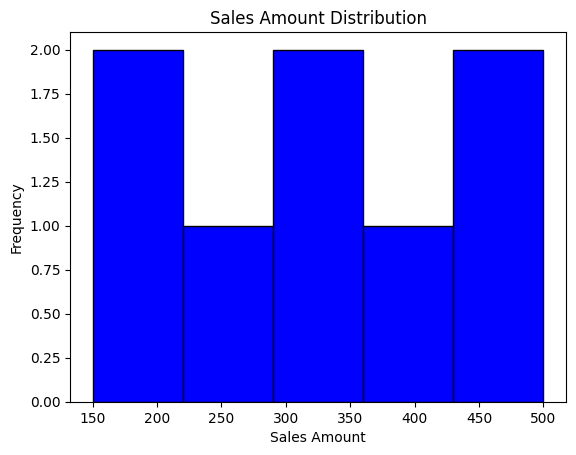

In [62]:
# Histograms

import matplotlib.pyplot as plt

# Sample DataFrame
import pandas as pd
data = {'SalesAmount': [200, 150, 400, 300, 250, 350, 450, 500]}
df = pd.DataFrame(data)

# Plotting a histogram of SalesAmount
plt.hist(df['SalesAmount'], bins=5, color='blue', edgecolor='black')
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

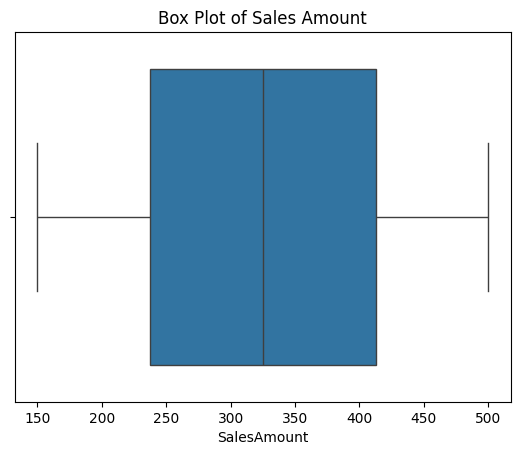

In [63]:
# Box Plots
import seaborn as sns

# Box plot for SalesAmount
sns.boxplot(x=df['SalesAmount'])
plt.title('Box Plot of Sales Amount')
#Box plots are particularly useful for detecting outliers, which are points that lie far outside the rest of the data.
plt.show()

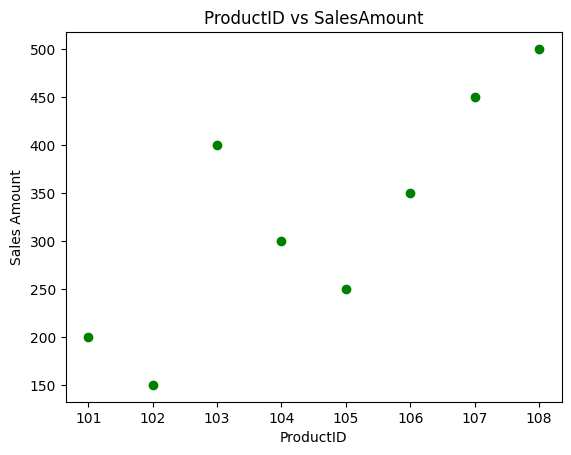

In [65]:
# Scatter Plots -  visualizes potential correlations between two variables.


# Scatter plot of SalesAmount vs another variable (e.g., ProductID)
df['ProductID'] = [101, 102, 103, 104, 105, 106, 107, 108]
plt.scatter(df['ProductID'], df['SalesAmount'], color='green')
plt.title('ProductID vs SalesAmount')
plt.xlabel('ProductID')
plt.ylabel('Sales Amount')
plt.show()

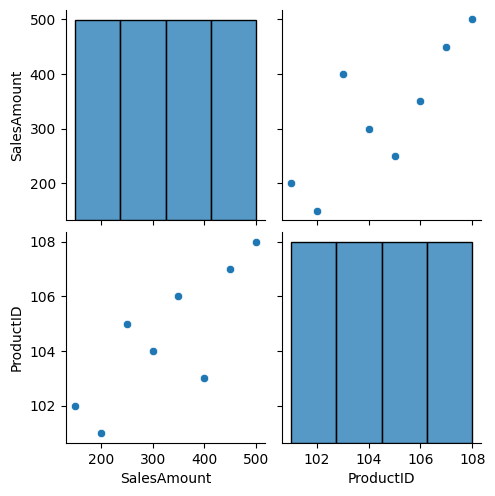

In [66]:
# Pair Plots - visualize pairwise relationships between multiple variables in the dataset

# Pair plot of the numerical columns in the dataset
sns.pairplot(df)
plt.show()

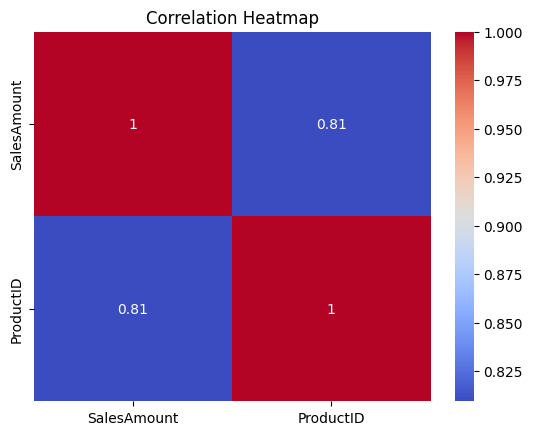

In [67]:
# Heatmaps for Correlation -  visual representation of a correlation matrix that shows the strength of relationships between numerical variables

# Correlation matrix
corr_matrix = df.corr()
# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Cleaning
#   Handling outliers,
#   Removing duplicates,
#   Handling inconsistent and incorrect data,
#   Working with text data,
#   Normalizing and transforming data.

<Axes: xlabel='SalesAmount'>

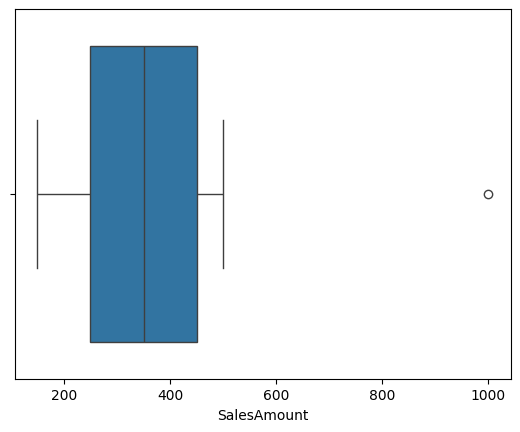

In [68]:
import seaborn as sns
import pandas as pd

# Sample DataFrame
data = {'SalesAmount': [200, 150, 400, 300, 250, 350, 450, 500, 1000]}
df = pd.DataFrame(data)

# Box plot to detect outliers
sns.boxplot(x=df['SalesAmount'])

In [69]:
from scipy import stats

# Calculate Z-scores
df['Z_Score'] = stats.zscore(df['SalesAmount'])

# Filter out outliers (Z-score > 3 or < -3)
df_outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print(df_outliers)

Empty DataFrame
Columns: [SalesAmount, Z_Score]
Index: []


In [70]:
# Remove outliers: If the outliers are likely to distort the analysis and are not meaningful.

df_cleaned = df[(df['Z_Score'] <= 3) & (df['Z_Score'] >= -3)]

In [71]:
# Cap or clip outliers: Replace outliers with a threshold value.

# Cap the values at 99th percentile
threshold = df['SalesAmount'].quantile(0.99)
df['SalesAmount'] = df['SalesAmount'].apply(lambda x: min(x, threshold))

In [80]:
# Sample DataFrame with duplicates
data = {'ProductID': [101, 102, 103, 101, 104, 102],
        'SalesAmount': [200, 150, 400, 200, 300, 150]}
df = pd.DataFrame(data)

# Detect duplicates
duplicates = df.duplicated()
print(duplicates)

0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool


In [73]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

   ProductID  SalesAmount
0        101          200
1        102          150
2        103          400
4        104          300


In [74]:
# Remove duplicates based on 'ProductID' column
df_no_duplicates = df.drop_duplicates(subset=['ProductID'])

In [75]:
# Sample DataFrame with incorrect data types
data = {'ProductID': ['101', '102', '103'], 'Date': ['2024-01-01', '2024-02-01', '2024-03-01']}
df = pd.DataFrame(data)

# Convert ProductID to integer
df['ProductID'] = df['ProductID'].astype(int)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
# # Handling Categorical Inconsistencies
#Sample DataFrame with inconsistent categories
data = {'Region': ['North', 'north', 'SOUTH', 'South']}
df = pd.DataFrame(data)

# Standardize the Region names to uppercase
df['Region'] = df['Region'].str.upper()
print(df)

  Region
0  NORTH
1  NORTH
2  SOUTH
3  SOUTH


In [77]:
# Working with Text Data
# Removing Unwanted Characters

# Sample DataFrame with messy text
data = {'Product': [' Product-A  ', ' Product-B ', 'Product-C']}
df = pd.DataFrame(data)

# Strip leading/trailing spaces
df['Product'] = df['Product'].str.strip()


In [78]:
# Replacing Text Patterns
# Replace '-' with space
df['Product'] = df['Product'].str.replace('-', ' ')

In [81]:
# Normalizing and Transforming Data

# Min-Max Scaling -  transforms the data to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['SalesAmount']] = scaler.fit_transform(df[['SalesAmount']])
print(df)

   ProductID  SalesAmount
0        101          0.2
1        102          0.0
2        103          1.0
3        101          0.2
4        104          0.6
5        102          0.0


In [82]:
# Log transformation - useful for handling data with a long tail or skewed distribution.
# Apply log transformation
df['LogSalesAmount'] = np.log(df['SalesAmount'] + 1)

In [ ]:
# Time Series Data  -  time series is a sequence of data points
# collected or recorded at successive points in time, often at uniform intervals (such as hourly, daily, monthly, or yearly).
# The order of the data points matters, and analyzing how the data changes over time is often a central focus.

# Working with datetime objects,
# Time-based indexing and slicing,
# Resampling and aggregation,
# Handling missing time data,
# Rolling and expanding windows,
# Time shifts and differences.

# Key Characteristics of Time Series Data:
# Temporal Ordering: Time series data is ordered by time, and the sequence in which data points occur is crucial.
# Frequency: Time series data can be recorded at various intervals, such as:
# Hourly: Sensor readings from a machine every hour.
# Daily: Stock prices at the end of each trading day.
# Monthly: Monthly sales data for a retail store.

# Trend and Seasonality: Time series data often exhibits trends (long-term upward or downward movements) and seasonality (recurring patterns over time).

In [83]:
import pandas as pd

# Sample data with date strings
data = {'Date': ['2024-01-01', '2024-01-02', '2024-01-03'], 'SalesAmount': [200, 150, 300]}
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date           datetime64[ns]
SalesAmount             int64
dtype: object


In [84]:
# Extracting Date Components
# Extract year, month, and day from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print(df)

        Date  SalesAmount  Year  Month  Day
0 2024-01-01          200  2024      1    1
1 2024-01-02          150  2024      1    2
2 2024-01-03          300  2024      1    3


In [85]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
print(df)

            SalesAmount  Year  Month  Day
Date                                     
2024-01-01          200  2024      1    1
2024-01-02          150  2024      1    2
2024-01-03          300  2024      1    3


In [86]:
# Slicing Time Series

# Slice data for a specific date
df_slice = df.loc['2024-01-02']
print(df_slice)

# Slice data for a date range
df_range = df.loc['2024-01-01':'2024-01-03']
print(df_range)

SalesAmount     150
Year           2024
Month             1
Day               2
Name: 2024-01-02 00:00:00, dtype: int64
            SalesAmount  Year  Month  Day
Date                                     
2024-01-01          200  2024      1    1
2024-01-02          150  2024      1    2
2024-01-03          300  2024      1    3


In [87]:
# Resampling-  involves changing the frequency of your time series data

# Resample daily data to monthly data and calculate the sum of sales
df_resampled = df.resample('M').sum()
print(df_resampled)

            SalesAmount  Year  Month  Day
Date                                     
2024-01-31          650  6072      3    6


<ipython-input-87-dda3c2481a6a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').sum()


In [88]:
# Resample daily data to weekly and calculate the mean sales
df_weekly_mean = df.resample('W').mean()
print(df_weekly_mean)

            SalesAmount    Year  Month  Day
Date                                       
2024-01-07   216.666667  2024.0    1.0  2.0


In [89]:
# Filling Missing Time Periods

# Convert to daily frequency and fill missing dates
df_filled = df.asfreq('D')
print(df_filled)

            SalesAmount  Year  Month  Day
Date                                     
2024-01-01          200  2024      1    1
2024-01-02          150  2024      1    2
2024-01-03          300  2024      1    3


In [90]:
# Interpolate missing values in the SalesAmount column
df_interpolated = df_filled.interpolate()
print(df_interpolated)

            SalesAmount  Year  Month  Day
Date                                     
2024-01-01          200  2024      1    1
2024-01-02          150  2024      1    2
2024-01-03          300  2024      1    3


In [92]:
# Rolling and expanding windows are techniques used to calculate statistics over a moving window of time.

import pandas as pd

data = {
    'Date': ['2024-01-01', '2024-01-15', '2024-01-31', '2024-02-01'],
    'SalesAmount': [200, 300, 400, 500]
}

df = pd.DataFrame(data)
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(df)

# Calculate a 3-day moving average of SalesAmount
df['3-day MA'] = df['SalesAmount'].rolling(window=3).mean()
print(df)

        Date  SalesAmount
0 2024-01-01          200
1 2024-01-15          300
2 2024-01-31          400
3 2024-02-01          500
        Date  SalesAmount  3-day MA
0 2024-01-01          200       NaN
1 2024-01-15          300       NaN
2 2024-01-31          400     300.0
3 2024-02-01          500     400.0


In [93]:
# Expanding windows calculate metrics over all observations up to the current point.

# Calculate expanding sum of SalesAmount
df['Expanding Sum'] = df['SalesAmount'].expanding().sum()
print(df)

        Date  SalesAmount  3-day MA  Expanding Sum
0 2024-01-01          200       NaN          200.0
1 2024-01-15          300       NaN          500.0
2 2024-01-31          400     300.0          900.0
3 2024-02-01          500     400.0         1400.0


In [94]:
# Time shifting refers to moving data points forward or backward along the time axis.

import pandas as pd

# Sample time series data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=5, freq='D'),
    'SalesAmount': [200, 250, 300, 350, 400]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Shift the data by 1 period (moving data forward)
df['Shifted_Sales'] = df['SalesAmount'].shift(1)
print(df)

# Forward Shifts: Positive numbers (e.g., shift(1)) move data forward.
# Backward Shifts: Negative numbers (e.g., shift(-1)) move data backward.

            SalesAmount  Shifted_Sales
Date                                  
2024-01-01          200            NaN
2024-01-02          250          200.0
2024-01-03          300          250.0
2024-01-04          350          300.0
2024-01-05          400          350.0


In [95]:
# The diff() function calculates the difference between consecutive time periods.

# Calculate the difference between consecutive periods
df['Sales_Difference'] = df['SalesAmount'].diff()
print(df)

# First Difference: diff(1) calculates the difference between the current and previous period (default behavior).
# Higher-Order Differences: You can calculate differences over longer periods by specifying an argument (e.g., diff(2) for second differences).

            SalesAmount  Shifted_Sales  Sales_Difference
Date                                                    
2024-01-01          200            NaN               NaN
2024-01-02          250          200.0              50.0
2024-01-03          300          250.0              50.0
2024-01-04          350          300.0              50.0
2024-01-05          400          350.0              50.0


In [96]:
# Calculate the percentage change between periods- useful for measuring relative changes over time
df['Pct_Change'] = df['SalesAmount'].pct_change() * 100
print(df)

            SalesAmount  Shifted_Sales  Sales_Difference  Pct_Change
Date                                                                
2024-01-01          200            NaN               NaN         NaN
2024-01-02          250          200.0              50.0   25.000000
2024-01-03          300          250.0              50.0   20.000000
2024-01-04          350          300.0              50.0   16.666667
2024-01-05          400          350.0              50.0   14.285714


In [97]:
# Moving Averages: You can combine shifting with rolling functions to calculate moving averages,
# a key technique in smoothing out time series data and identifying trends.

# Calculate a 3-day moving average
df['Moving_Avg'] = df['SalesAmount'].rolling(window=3).mean()
print(df)

            SalesAmount  Shifted_Sales  Sales_Difference  Pct_Change  \
Date                                                                   
2024-01-01          200            NaN               NaN         NaN   
2024-01-02          250          200.0              50.0   25.000000   
2024-01-03          300          250.0              50.0   20.000000   
2024-01-04          350          300.0              50.0   16.666667   
2024-01-05          400          350.0              50.0   14.285714   

            Moving_Avg  
Date                    
2024-01-01         NaN  
2024-01-02         NaN  
2024-01-03       250.0  
2024-01-04       300.0  
2024-01-05       350.0  
